In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from typing import Dict
from numpy import typing as npt
from sys import stderr

In [2]:
def read_chains(filename: str) -> Dict[str, npt.NDArray]:
    try:
        with open(filename, "r") as f:
            chains = dict()
            for line in f.readlines():
                name, *data = line.split()
                chains[name] = np.array(list(map(float, data)))
            return chains
    except IOError as e:
        print(f"{e}", file=stderr)
        return dict()

In [3]:
def plot_chains(chains):
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 9))

    for i in range(2):
        sns.histplot(chains[f'theta{i}'], stat='density', ax=ax[0, i])
        ax[0, i].set_xlabel(f"$\\theta_{i}$", fontsize=18)
        
        ax[1, i].plot(range(len(chains[f'theta{i}'])), chains[f'theta{i}'])
        ax[1, i].set_xlabel("Iteration", fontsize=18)
        ax[1, i].set_ylabel(f"$\\theta_{i}$", fontsize=18)

    plt.show()

In [4]:
def read_contour_data(file: str):
    try:
        with open(file, "r") as f:
            return np.array([list(map(float, line.split())) for line in f.readlines()])
    except IOError as e:
        print(f"{e}", file=stderr)
        return np.array([])

In [5]:
with open("../../benchmarks/data/simpson/test_data.txt", "r") as f:
    x_data = np.array(list(map(float, f.readline().split())))
    y_data = np.array(list(map(float, f.readline().split())))

# Without hypercubes

In [6]:
# chains_no_hc = read_chains("../simpson_no_hc_chains.txt")
chains_no_hc = read_chains("../simpson_convergence/no_hc_1000.txt")

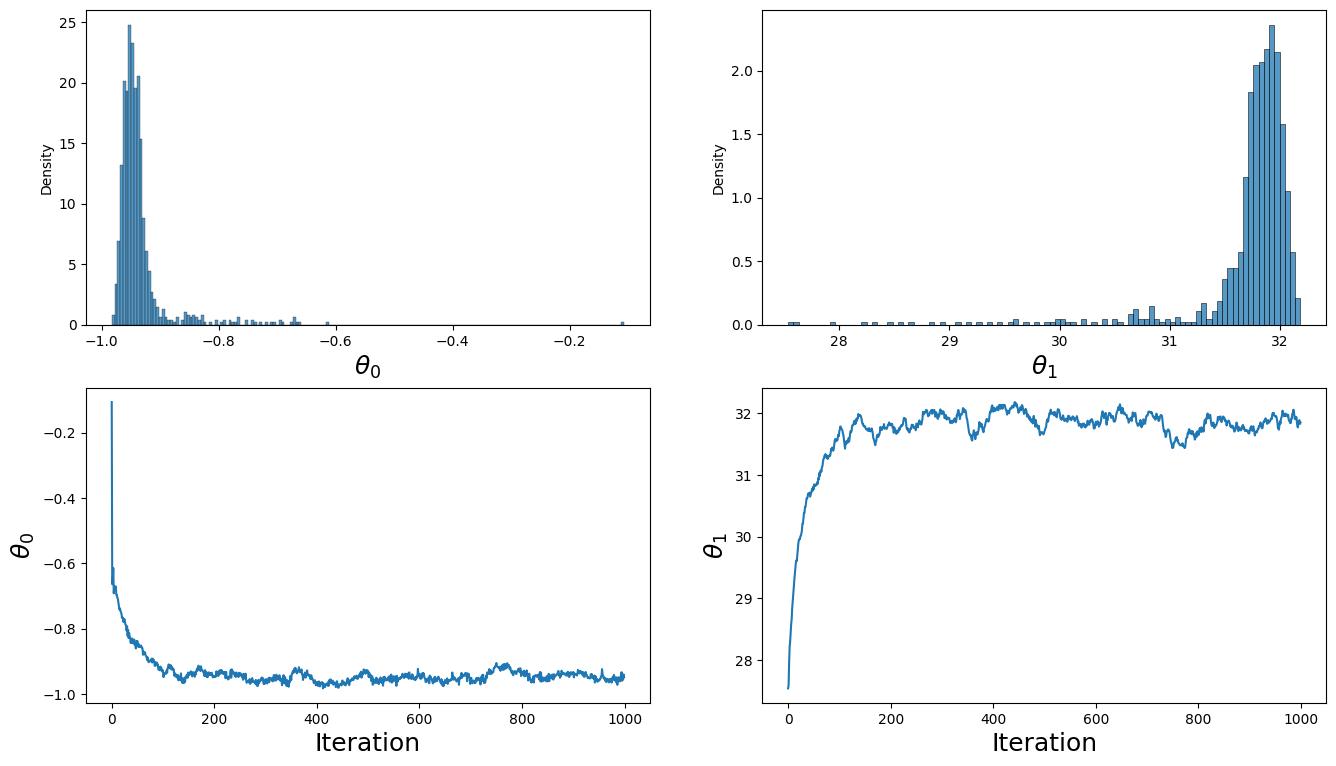

In [7]:
plot_chains(chains_no_hc)

In [8]:
mean_slope_no_hc     = np.mean(chains_no_hc['theta0'])
mean_intersect_no_hc = np.mean(chains_no_hc['theta1'])

print(f"{mean_slope_no_hc     = }")
print(f"{mean_intersect_no_hc = }")

mean_slope_no_hc     = -0.9350254290422074
mean_intersect_no_hc = 31.722231460920266


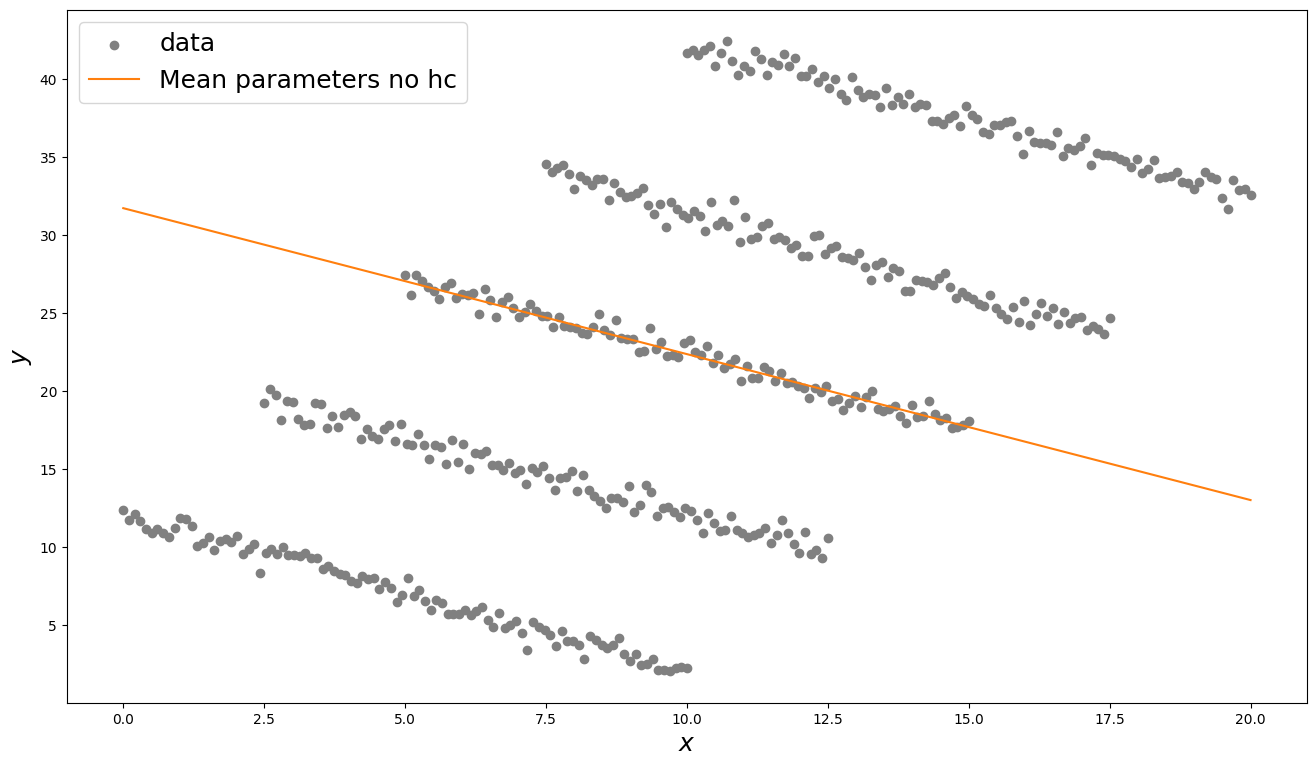

In [9]:
plt.figure(figsize=(16, 9))

plt.scatter(x_data, y_data, label="data", color="grey")

x = np.linspace(np.min(x_data), np.max(x_data), 1000)
y = mean_slope_no_hc * x + mean_intersect_no_hc
plt.plot(x, y, label="Mean parameters no hc", color="tab:orange")

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(fontsize=18)

# plt.savefig("simpson_pictures/simpson_no_hc_mean.eps")

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


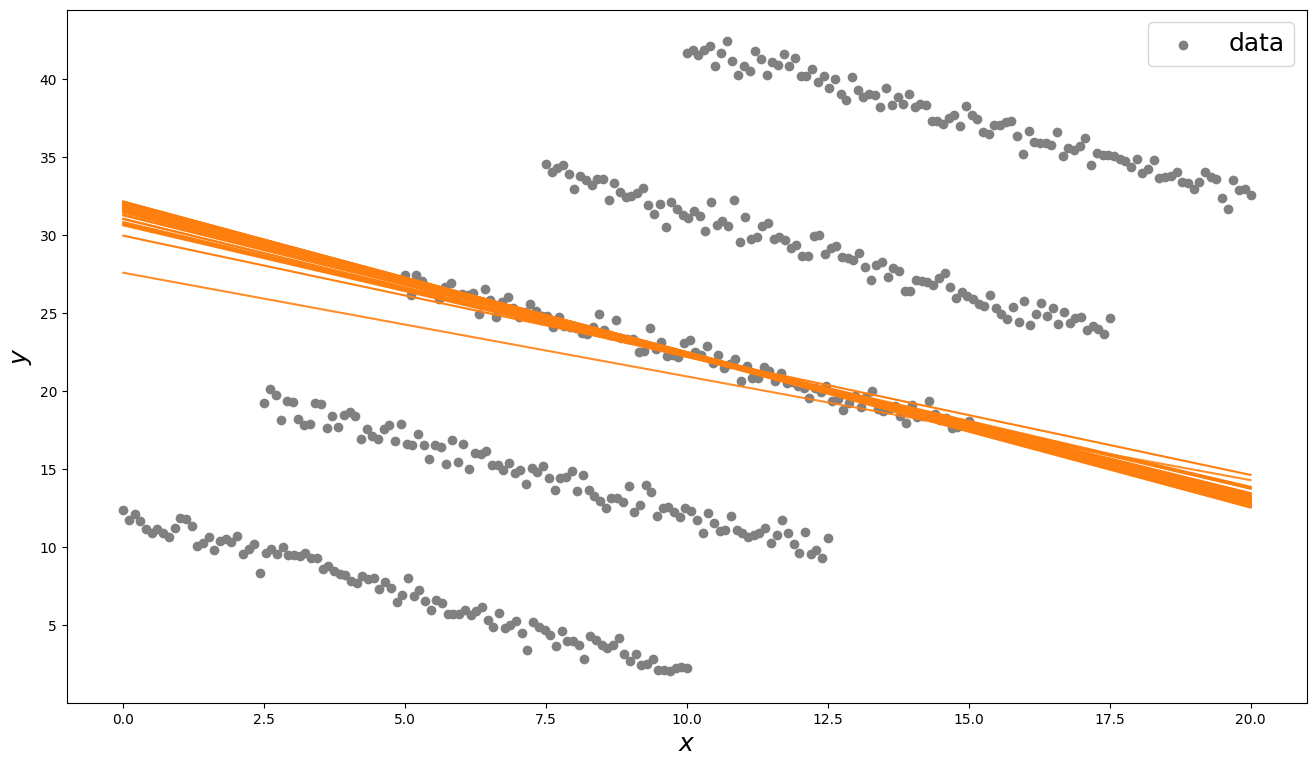

In [10]:
plt.figure(figsize=(16, 9))

plt.scatter(x_data, y_data, label="data", color="grey")

x = np.linspace(np.min(x_data), np.max(x_data), 1000)
for j in range(100):
    idx = np.random.randint(0, len(chains_no_hc['theta0']))
    slope = chains_no_hc['theta0'][idx]
    intersect = chains_no_hc['theta1'][idx]
    log_posterior = chains_no_hc['log_posterior'][idx]

    alpha = np.sqrt((log_posterior - np.min(chains_no_hc['log_posterior'])) / (np.max(chains_no_hc['log_posterior']) - np.min(chains_no_hc['log_posterior'])))

    y = slope * x + intersect
    plt.plot(x, y, color="tab:orange", alpha=alpha)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(fontsize=18)

plt.savefig("simpson_pictures/simpson_no_hc.eps")

plt.show()


# With hypercubes

In [11]:
num_hypercubes = 5

chains_hc = [read_chains(f"../simpson_chains_hc_{i}.txt") for i in range(num_hypercubes)]

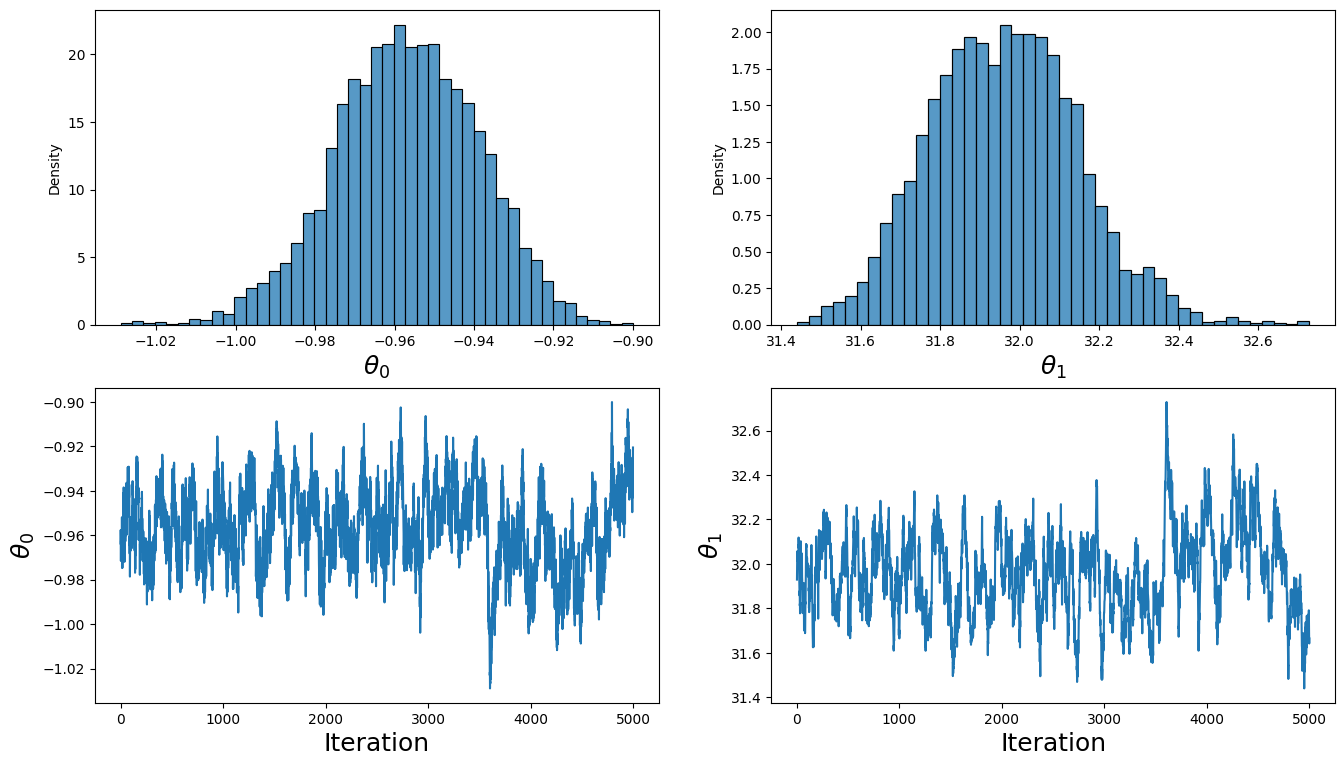

In [12]:
plot_chains(chains_hc[0])

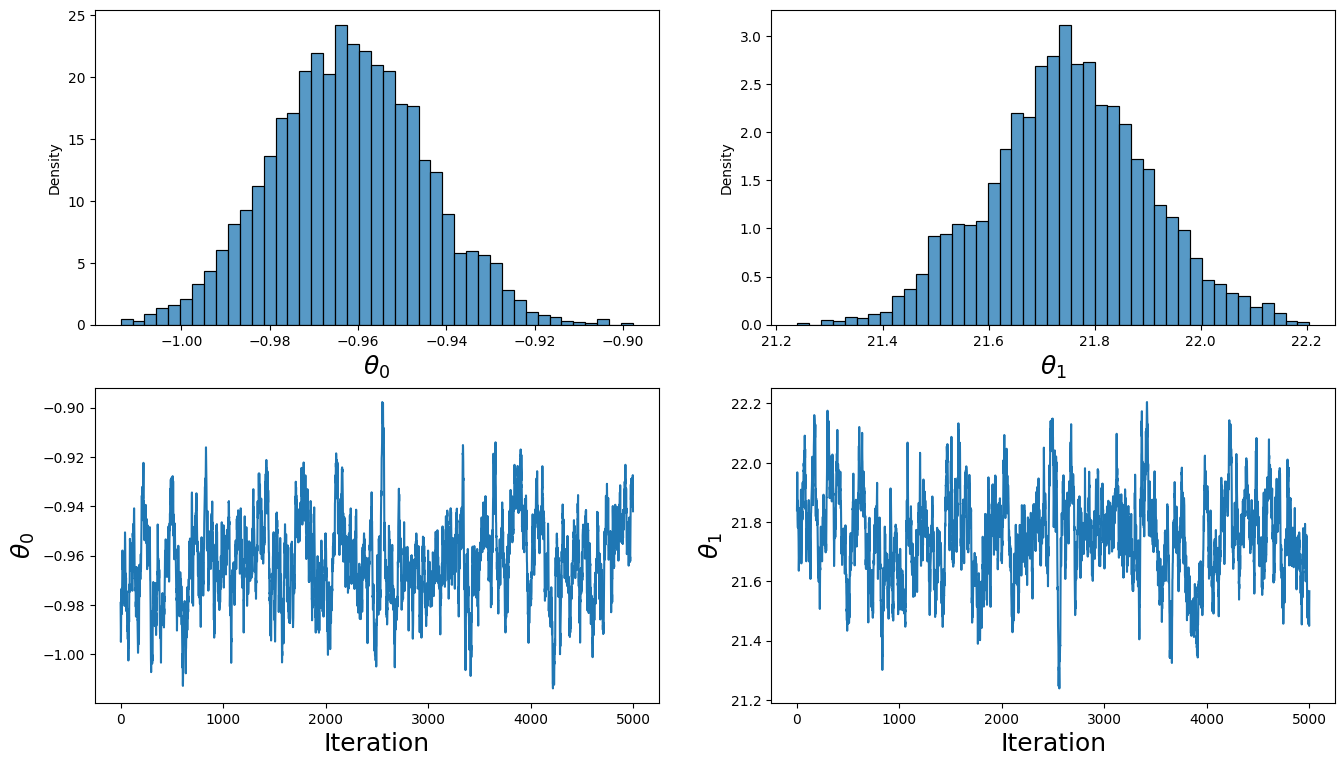

In [13]:
plot_chains(chains_hc[1])

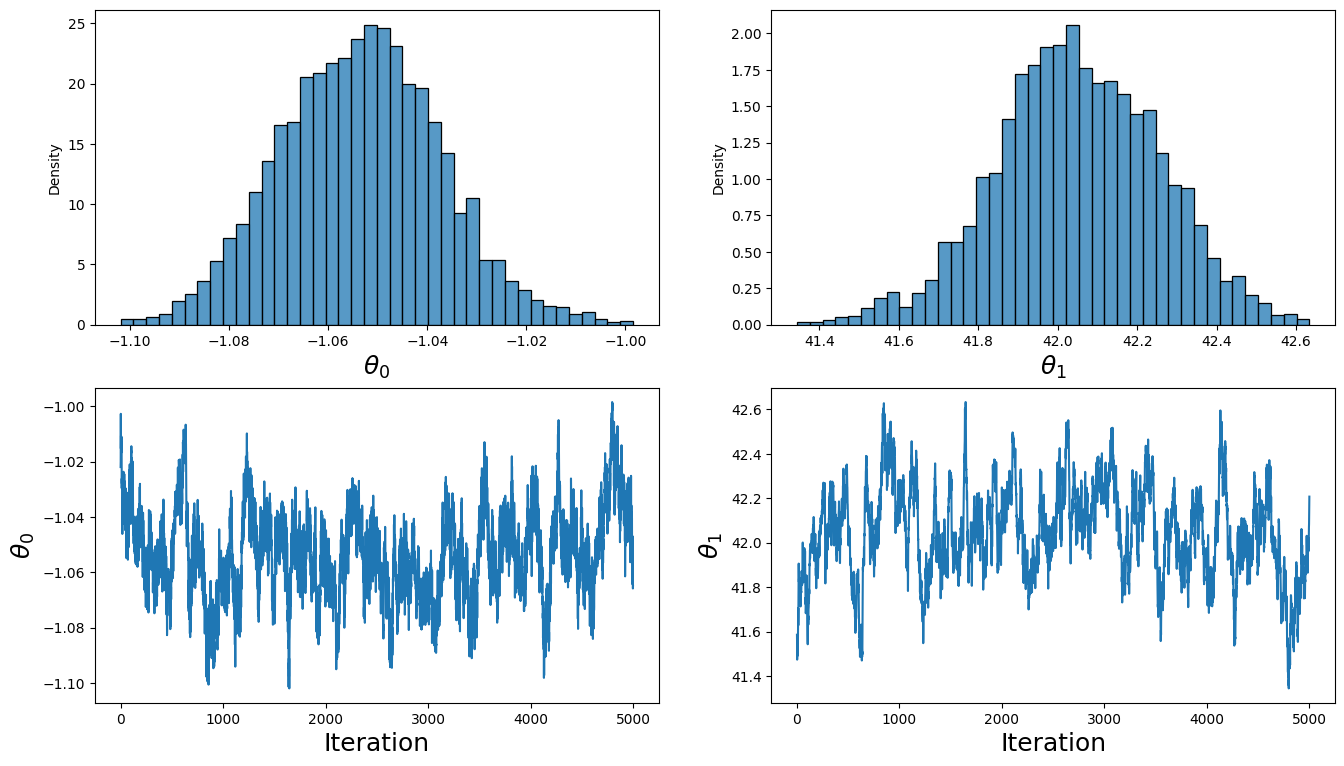

In [14]:
plot_chains(chains_hc[2])

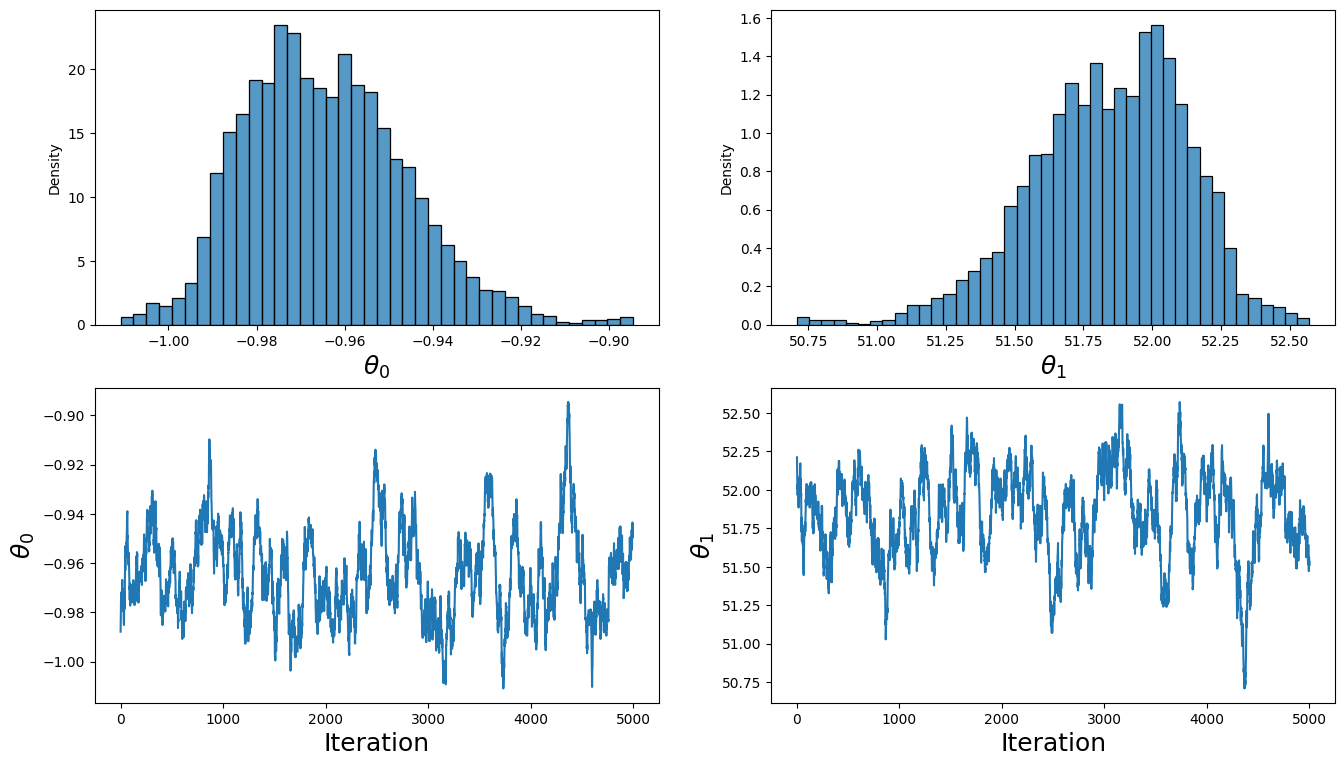

In [15]:
plot_chains(chains_hc[3])

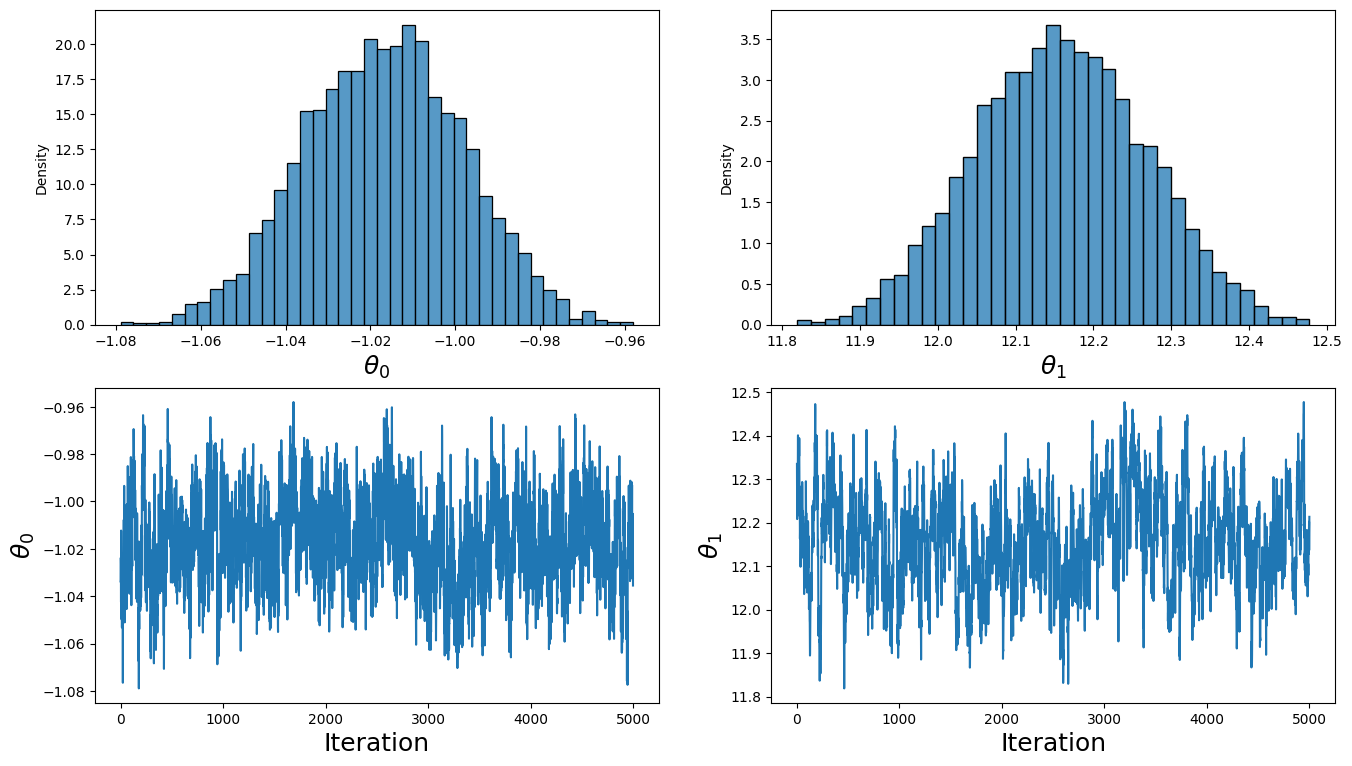

In [16]:
plot_chains(chains_hc[4])

In [17]:
# plot_chains(chains_hc[5])

In [18]:
mean_slope_hc     = [np.mean(chains['theta0']) for chains in chains_hc]
mean_intersect_hc = [np.mean(chains['theta1']) for chains in chains_hc]

print(f"{mean_slope_hc     = }")
print(f"{mean_intersect_hc = }")

mean_slope_hc     = [-0.9570274936235532, -0.9621074992168638, -1.0534688503760363, -0.9644647083265941, -1.01676936352863]
mean_intersect_hc = [31.961702125700377, 21.751248502205474, 42.0485974516796, 51.84406668284351, 12.157301604095519]


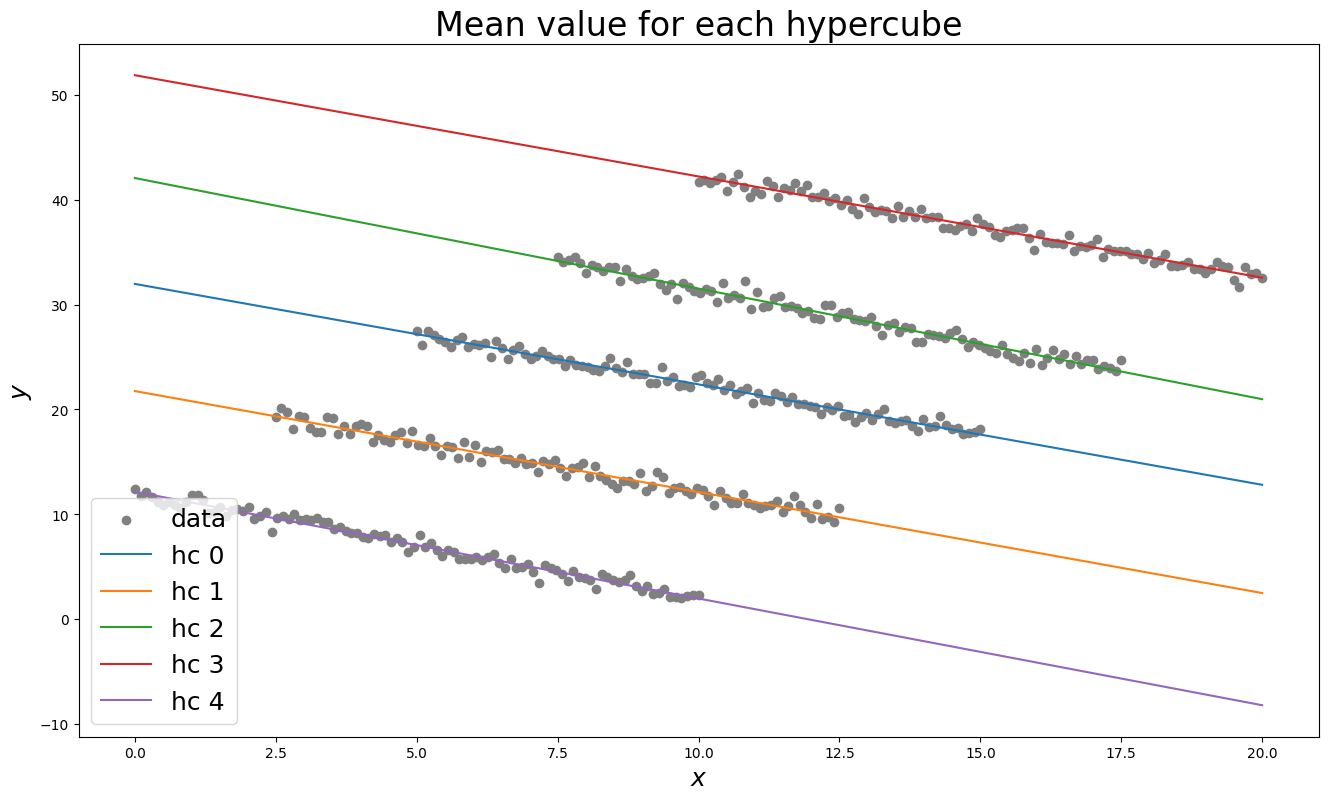

In [19]:
plt.figure(figsize=(16, 9))

plt.scatter(x_data, y_data, label="data", color="grey")

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]

x = np.linspace(np.min(x_data), np.max(x_data), 1000)
for i, (slope, intersect, color) in enumerate(zip(mean_slope_hc, mean_intersect_hc, colors)):
    y = slope * x + intersect
    plt.plot(x, y, label=f"hc {i}", color=color)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title("Mean value for each hypercube", fontsize=24)
plt.legend(fontsize=18)

# plt.savefig("simpson_pictures/simpson_with_hc_mean.eps")

plt.show()

In [20]:
min_llh = np.min(np.concatenate([chain['log_posterior'] for chain in chains_hc]))
max_llh = np.max(np.concatenate([chain['log_posterior'] for chain in chains_hc]))

print(f"{min_llh = }")
print(f"{max_llh = }")

min_llh = -376.6618744241004
max_llh = -361.907247016467


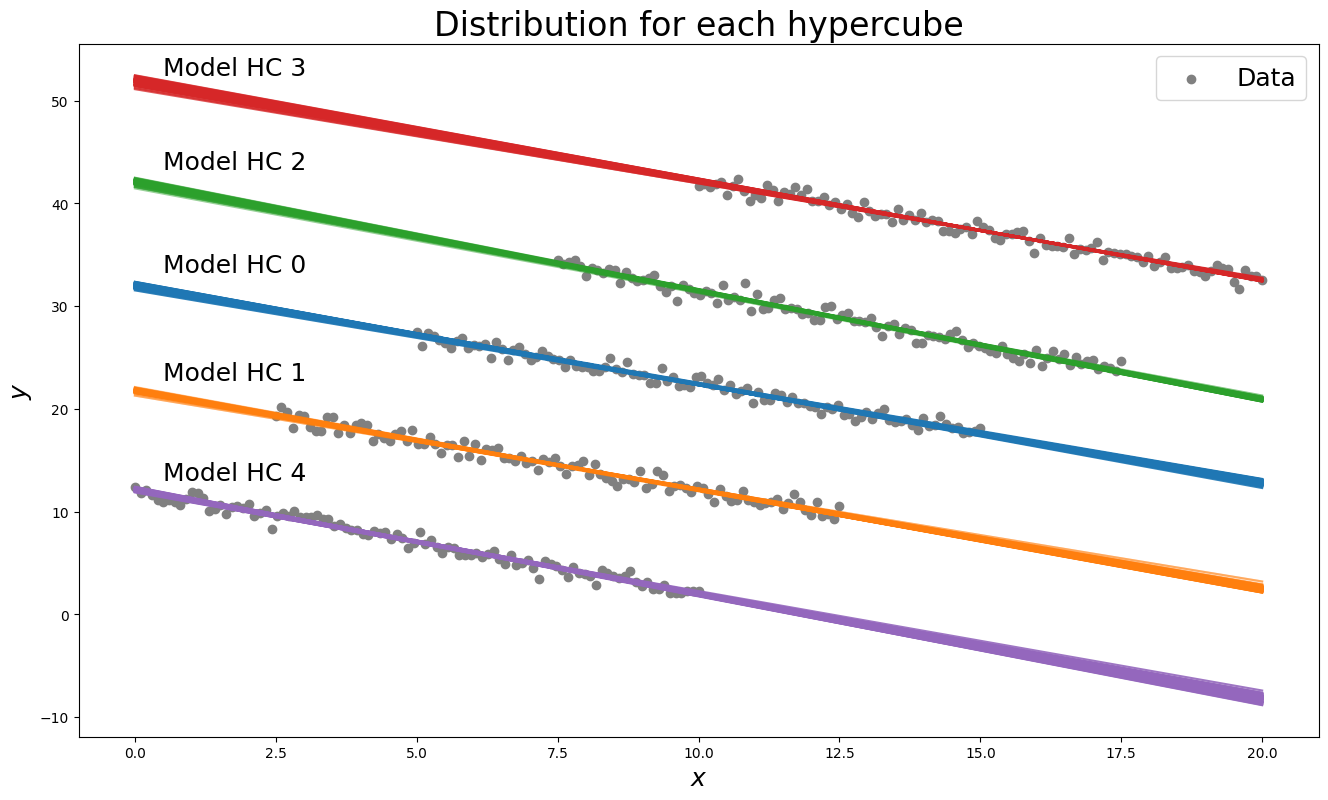

In [35]:
plt.figure(figsize=(16, 9))

plt.scatter(x_data, y_data, label="Data", color="grey")

# colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
assert len(colors) == num_hypercubes

n = 100
x = np.linspace(np.min(x_data), np.max(x_data), 1000)
for i, color in enumerate(colors):
    for j in range(n):
        idx = np.random.randint(0, len(chains_hc[i]['theta0']))
        slope = chains_hc[i]['theta0'][idx]
        intersect = chains_hc[i]['theta1'][idx]
        log_posterior = chains_hc[i]['log_posterior'][idx]

        alpha = np.sqrt((log_posterior - min_llh) / (max_llh - min_llh))

        y = slope * x + intersect
        plt.plot(x, y, color=color, alpha=alpha)
    plt.annotate(text=f"Model HC {i}", xy=(x[0], y[0]), xytext=(x[0]+0.5, y[0]+1), fontsize=18)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title("Distribution for each hypercube", fontsize=24)
plt.legend(fontsize=18)

# plt.savefig("simpson_pictures/simpson_with_hc.eps")

plt.show()

# Combined results with and without HC

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


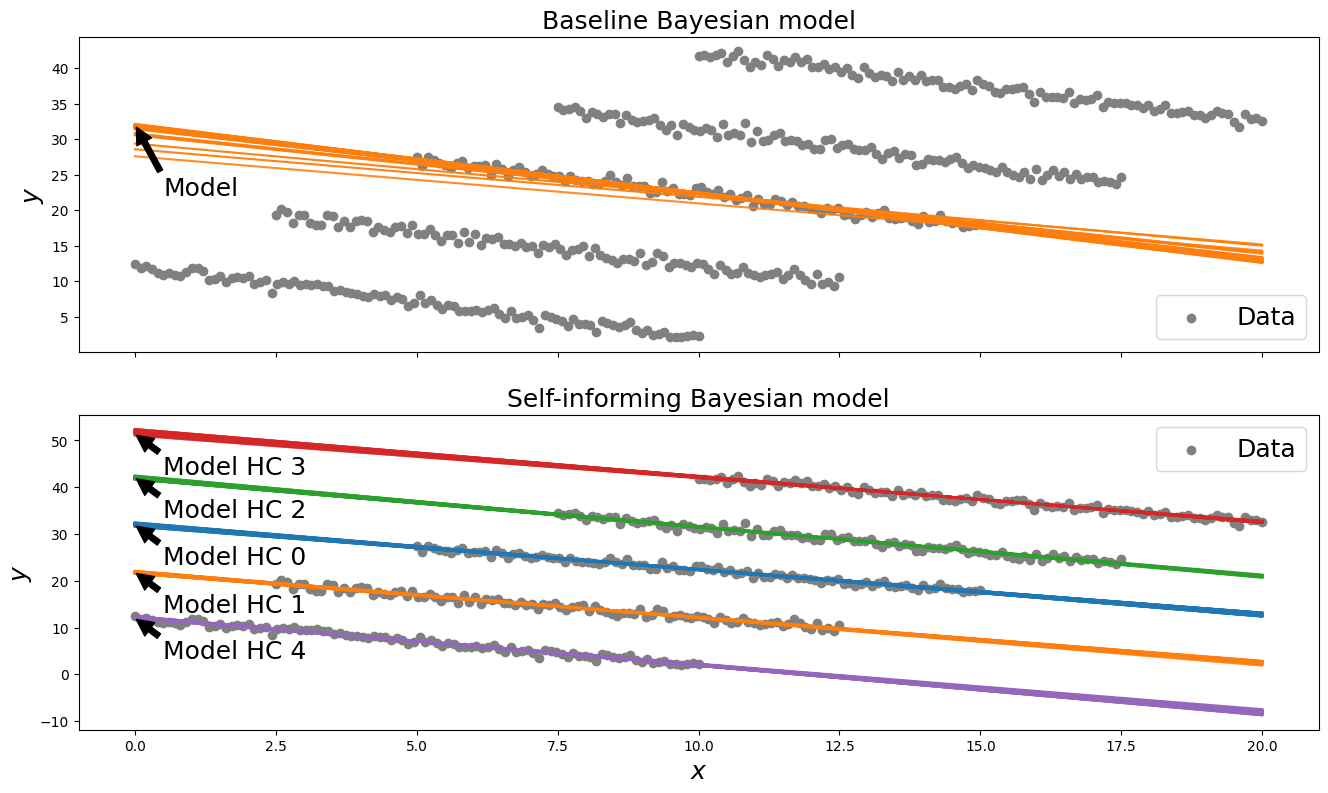

In [53]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 9), sharex=True)

ax[0].scatter(x_data, y_data, label="Data", color="grey")

x = np.linspace(np.min(x_data), np.max(x_data), 1000)
for j in range(100):
    idx = np.random.randint(0, len(chains_no_hc['theta0']))
    slope = chains_no_hc['theta0'][idx]
    intersect = chains_no_hc['theta1'][idx]
    log_posterior = chains_no_hc['log_posterior'][idx]

    alpha = np.sqrt((log_posterior - np.min(chains_no_hc['log_posterior'])) / (np.max(chains_no_hc['log_posterior']) - np.min(chains_no_hc['log_posterior'])))

    y = slope * x + intersect
    ax[0].plot(x, y, color="tab:orange", alpha=alpha)
ax[0].annotate(text=f"Model",
               xy=(x[0], y[0]),
               xytext=(x[0]+0.5, y[0]-10),
               fontsize=18,
               arrowprops=dict(facecolor='black', shrink=0.05))

# ax[0].set_xlabel("$x$", fontsize=18)
ax[0].set_ylabel("$y$", fontsize=18)
ax[0].set_title("Baseline Bayesian model", fontsize=18)
ax[0].legend(fontsize=18, loc="lower right")

# -------------------------------------------------------------------------------------------------------------------------------------------------

ax[1].scatter(x_data, y_data, label="Data", color="grey")

# colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
assert len(colors) == num_hypercubes

n = 100
x = np.linspace(np.min(x_data), np.max(x_data), 1000)
for i, color in enumerate(colors):
    for j in range(n):
        idx = np.random.randint(0, len(chains_hc[i]['theta0']))
        slope = chains_hc[i]['theta0'][idx]
        intersect = chains_hc[i]['theta1'][idx]
        log_posterior = chains_hc[i]['log_posterior'][idx]

        alpha = np.sqrt((log_posterior - min_llh) / (max_llh - min_llh))

        y = slope * x + intersect
        ax[1].plot(x, y, color=color, alpha=alpha)
    ax[1].annotate(text=f"Model HC {i}",
                   xy=(x[0], y[0]),
                   xytext=(x[0]+0.5, y[0]-8.5),
                   fontsize=18,
                   arrowprops=dict(facecolor='black', shrink=0.05))

ax[1].set_xlabel("$x$", fontsize=18)
ax[1].set_ylabel("$y$", fontsize=18)
ax[1].set_title("Self-informing Bayesian model", fontsize=18)
ax[1].legend(fontsize=18)

plt.savefig("simpson_pictures/simpson_results_combined.eps")

plt.show()

# Histogram of chains

In [22]:
X_contour = read_contour_data("../simpson_contour_x.txt")
Y_contour = read_contour_data("../simpson_contour_y.txt")
Z_contour = read_contour_data("../simpson_contour_z.txt")

In [23]:
def plot_hist_vs_contour(chain, title):
    fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
    # fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

    ax[0].hist2d(x=chain['theta0'],
                 y=chain['theta1'],
                 bins=350)
    ax[0].set_xlabel("$\\theta_0$: slope", fontsize=18)
    ax[0].set_ylabel("$\\theta_1$: intersect", fontsize=18)
    ax[0].set_title(title, fontsize=18)

    x_idx, = np.where((X_contour[:, 0] >= (np.min(chain['theta0']) - 0.1)) * (X_contour[:, 0] <= (np.max(chain['theta0']) + 0.1)))
    y_idx, = np.where((Y_contour[0, :] >= (np.min(chain['theta1']) - 0.1)) * (Y_contour[0, :] <= (np.max(chain['theta1']) + 0.1)))

    X_plot = np.ndarray(shape=(x_idx.shape[0], y_idx.shape[0]))
    Y_plot = np.ndarray(shape=(x_idx.shape[0], y_idx.shape[0]))
    Z_plot = np.ndarray(shape=(x_idx.shape[0], y_idx.shape[0]))
    for i, xi in enumerate(x_idx):
        for j, yj in enumerate(y_idx):
            X_plot[i, j] = X_contour[xi, yj]
            Y_plot[i, j] = Y_contour[xi, yj]
            Z_plot[i, j] = Z_contour[xi, yj]

    ax[1].contourf(X_plot, Y_plot, Z_plot, levels=100)
    ax[1].set_xlabel("$\\theta_0$: slope", fontsize=18)
    ax[1].set_ylabel("$\\theta_1$: intersect", fontsize=18)
    ax[1].set_xlim([np.min(chain['theta0']), np.max(chain['theta0'])])
    ax[1].set_ylim([np.min(chain['theta1']), np.max(chain['theta1'])])

    plt.show()

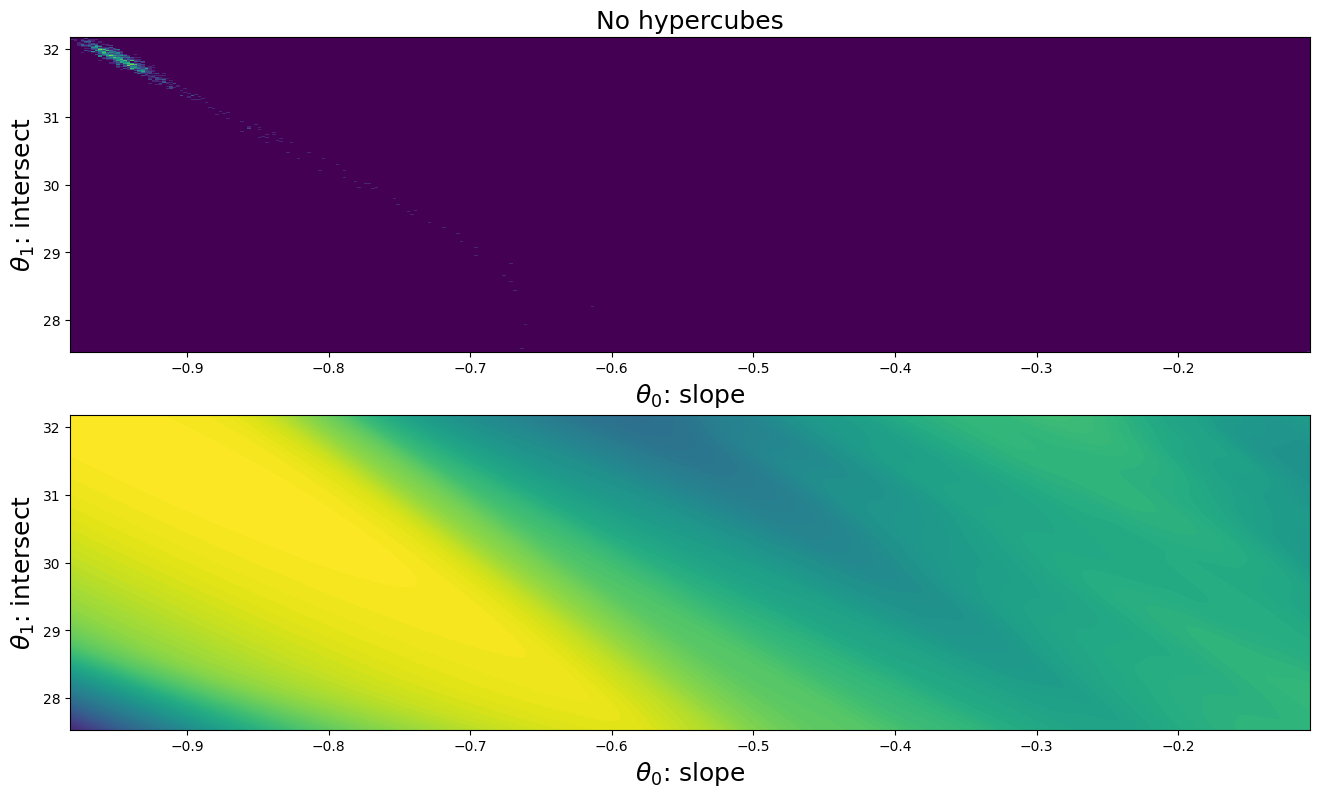

In [24]:
plot_hist_vs_contour(chains_no_hc, "No hypercubes")

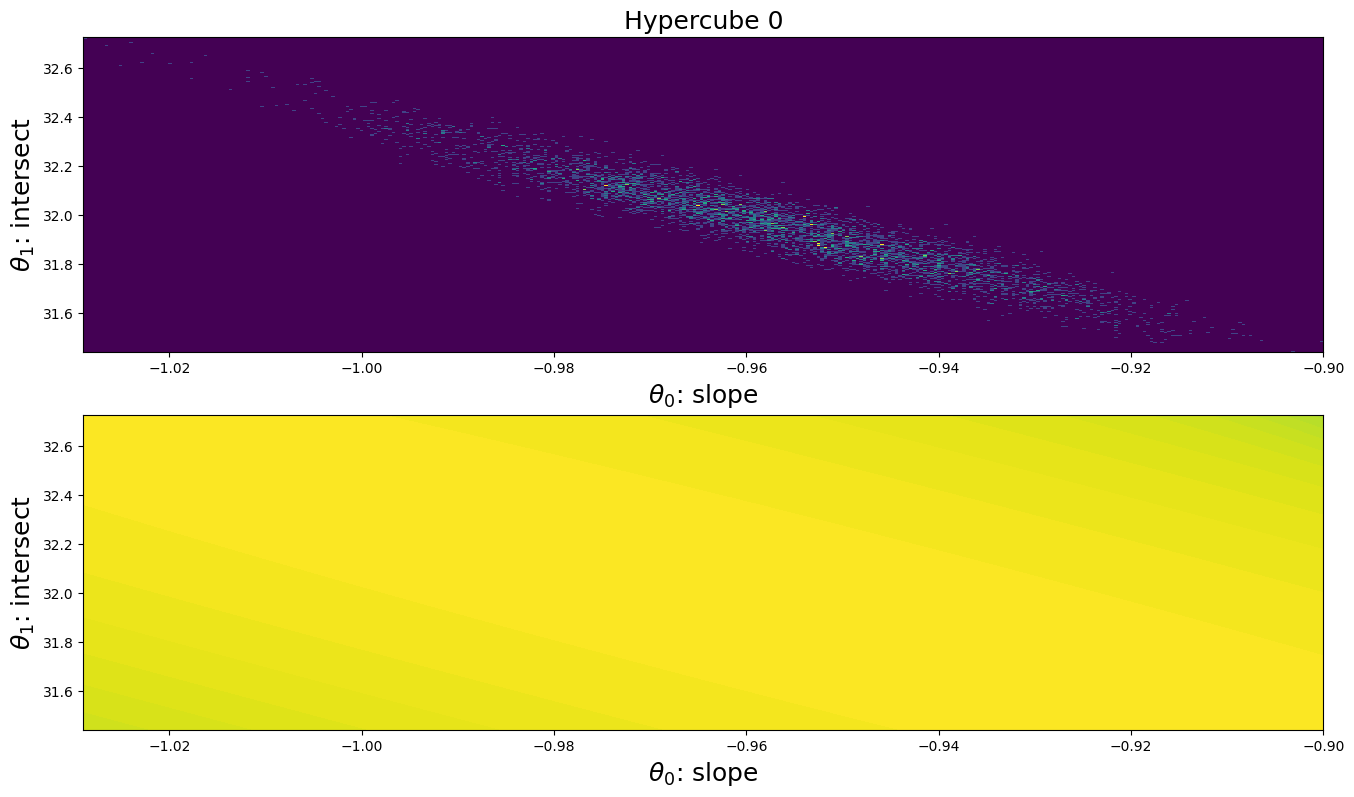

In [25]:
plot_hist_vs_contour(chains_hc[0], "Hypercube 0")

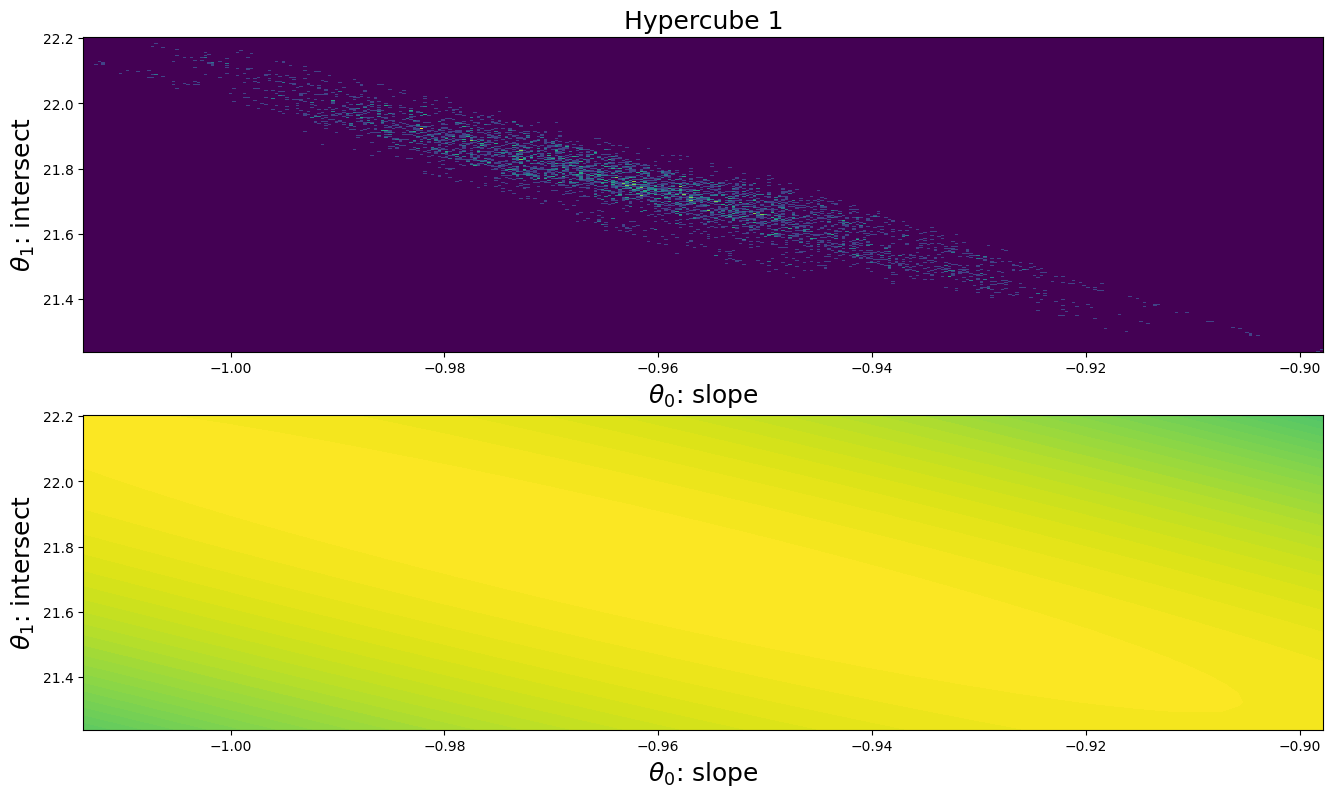

In [26]:
plot_hist_vs_contour(chains_hc[1], "Hypercube 1")

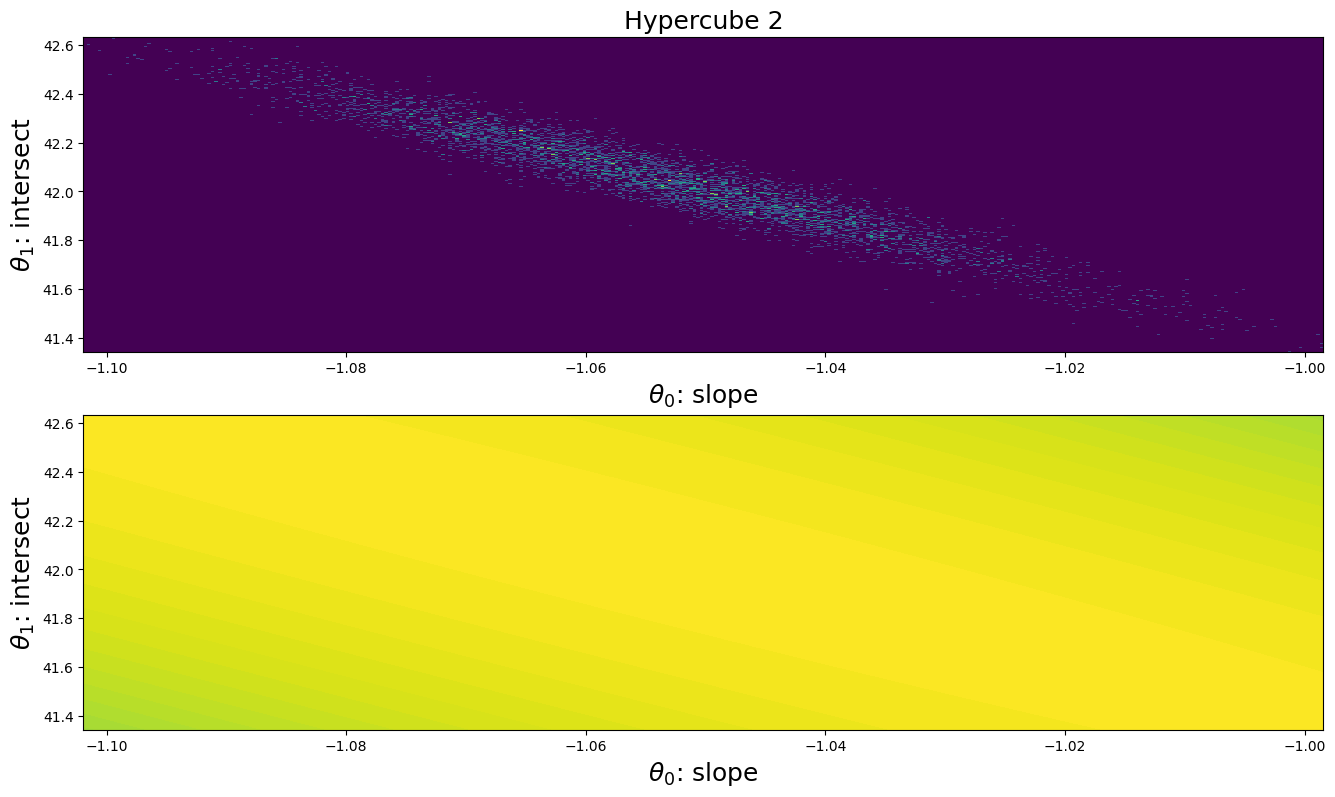

In [27]:
plot_hist_vs_contour(chains_hc[2], "Hypercube 2")

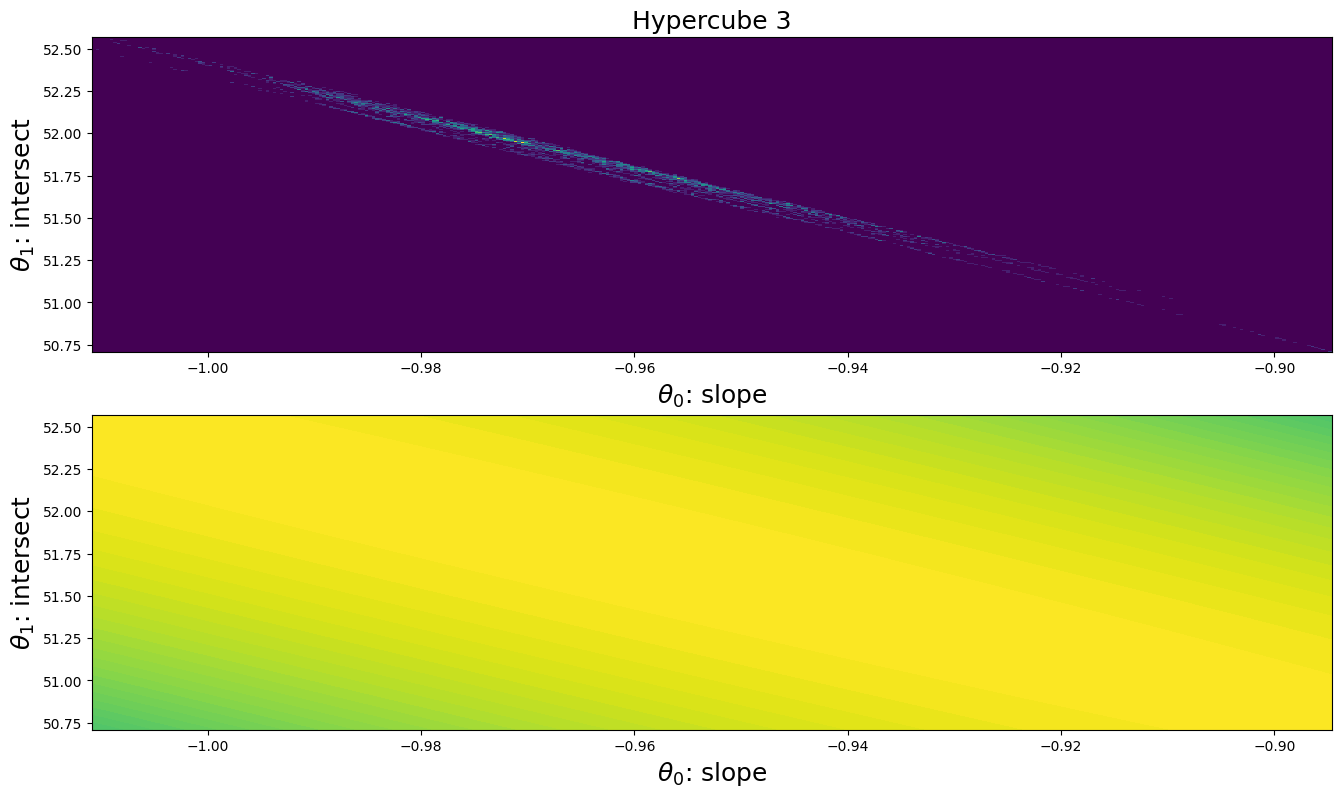

In [28]:
plot_hist_vs_contour(chains_hc[3], "Hypercube 3")

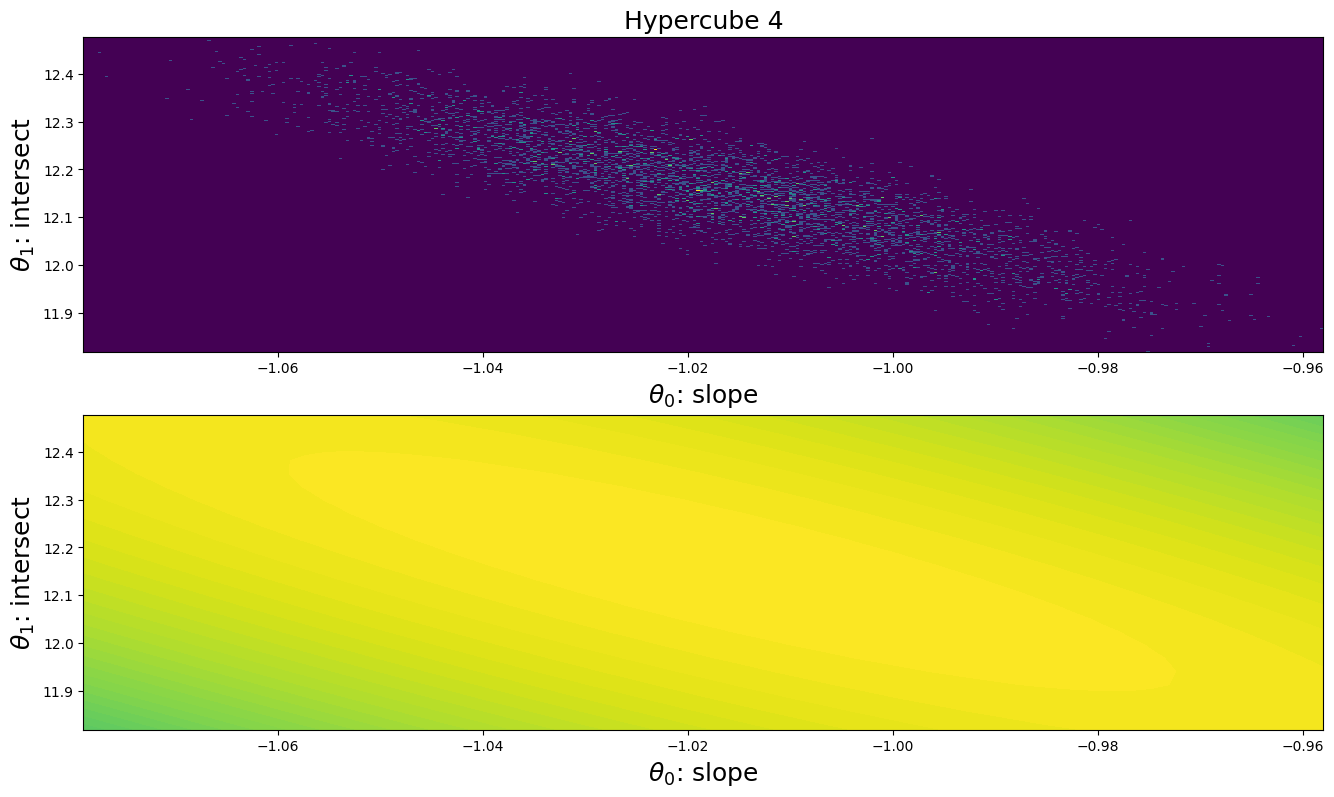

In [29]:
plot_hist_vs_contour(chains_hc[4], "Hypercube 4")

In [30]:
# plot_hist_vs_contour(chains_hc[5], "Hypercube 5")

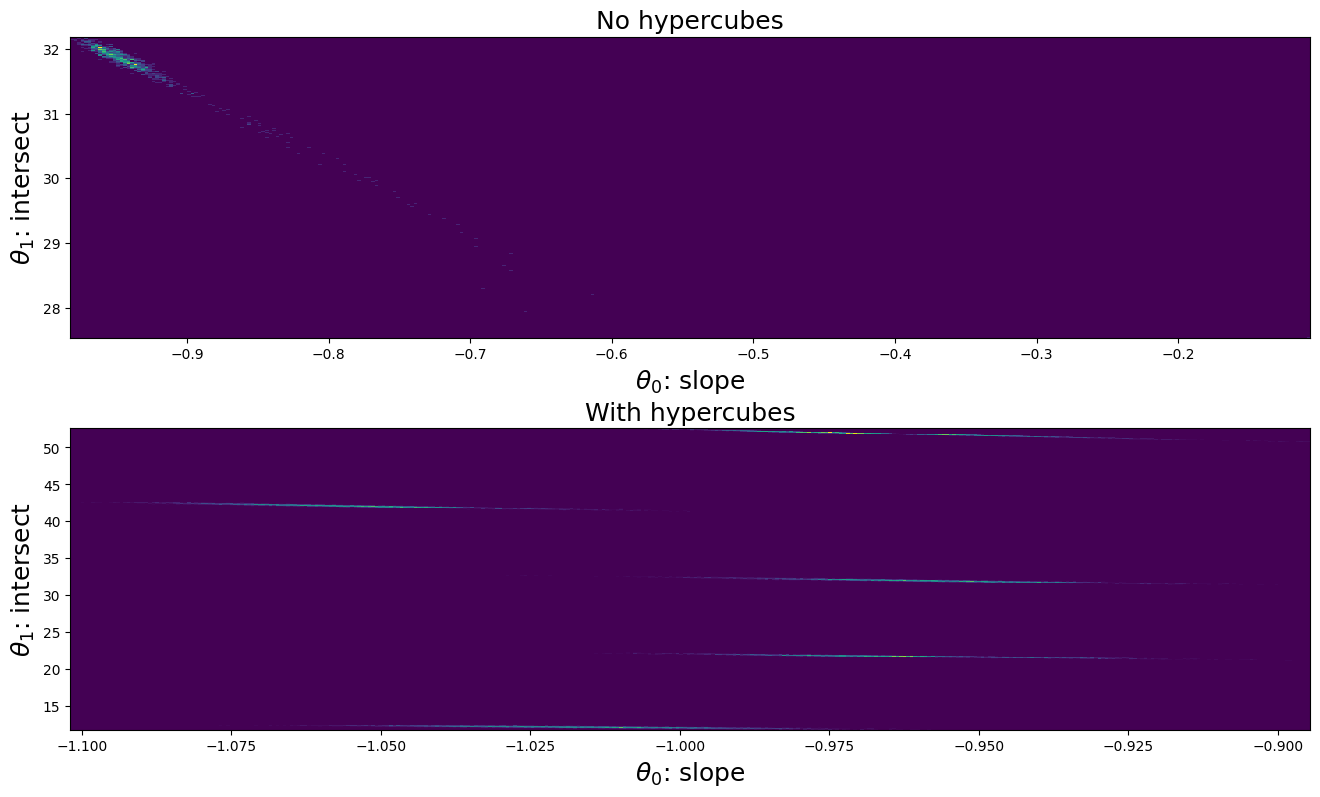

In [31]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

ax[0].hist2d(x=chains_no_hc['theta0'],
             y=chains_no_hc['theta1'],
             bins=350)
ax[0].set_xlabel("$\\theta_0$: slope", fontsize=18)
ax[0].set_ylabel("$\\theta_1$: intersect", fontsize=18)
ax[0].set_title("No hypercubes", fontsize=18)
# ax[0].set_xlim([-1.5, 1.5])
# ax[0].set_ylim([0.0, 55.0])

ax[1].hist2d(x=np.concatenate([chain['theta0'] for chain in chains_hc]),
             y=np.concatenate([chain['theta1'] for chain in chains_hc]),
             bins=350)
ax[1].set_xlabel("$\\theta_0$: slope", fontsize=18)
ax[1].set_ylabel("$\\theta_1$: intersect", fontsize=18)
ax[1].set_title("With hypercubes", fontsize=18)
# ax[1].set_xlim([-1.5, 1.5])
# ax[1].set_ylim([0.0, 55.0])

plt.show()

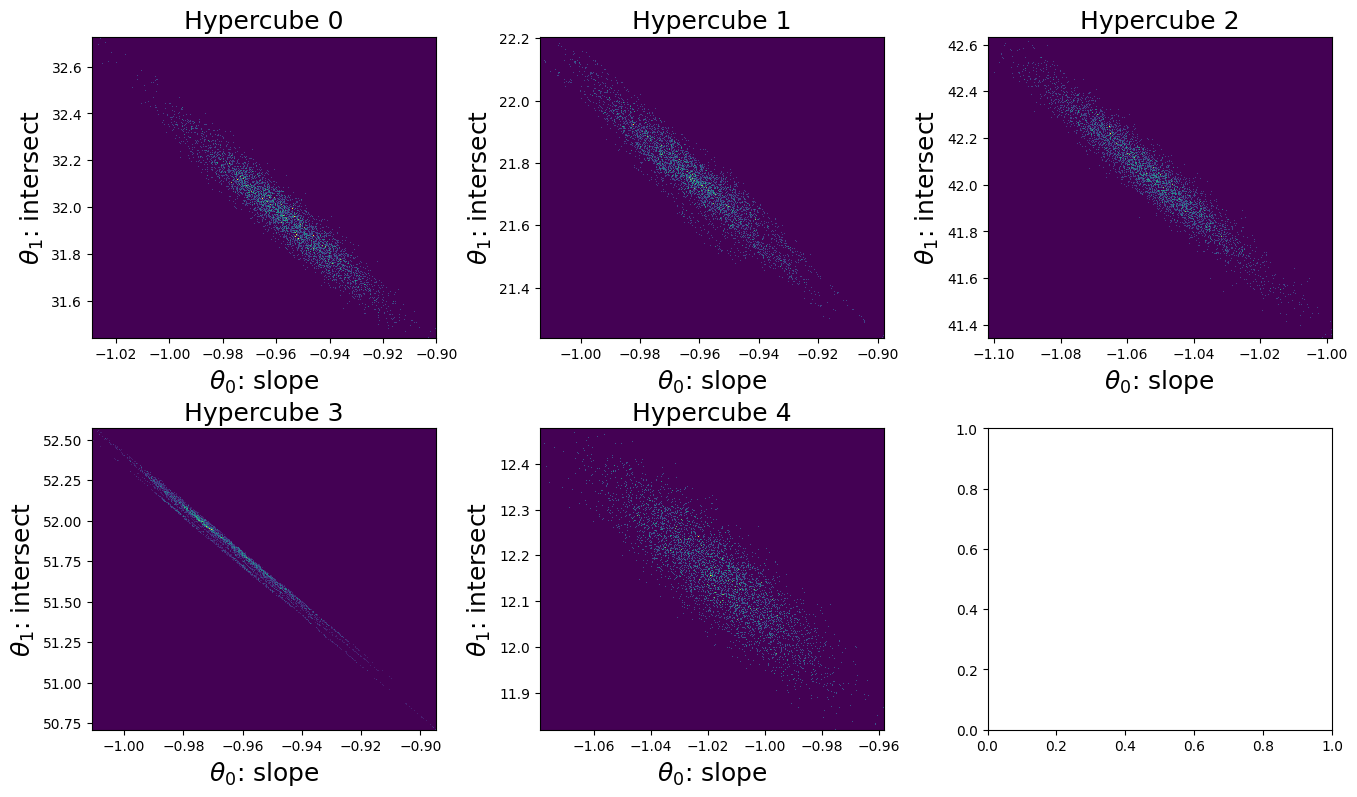

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
ax = ax.ravel()

for i in range(num_hypercubes):
    ax[i].hist2d(x=chains_hc[i]['theta0'],
                 y=chains_hc[i]['theta1'],
                 bins=350)
    ax[i].set_xlabel("$\\theta_0$: slope", fontsize=18)
    ax[i].set_ylabel("$\\theta_1$: intersect", fontsize=18)
    ax[i].set_title(f"Hypercube {i}", fontsize=18)

plt.show()

# Visualize sampler path

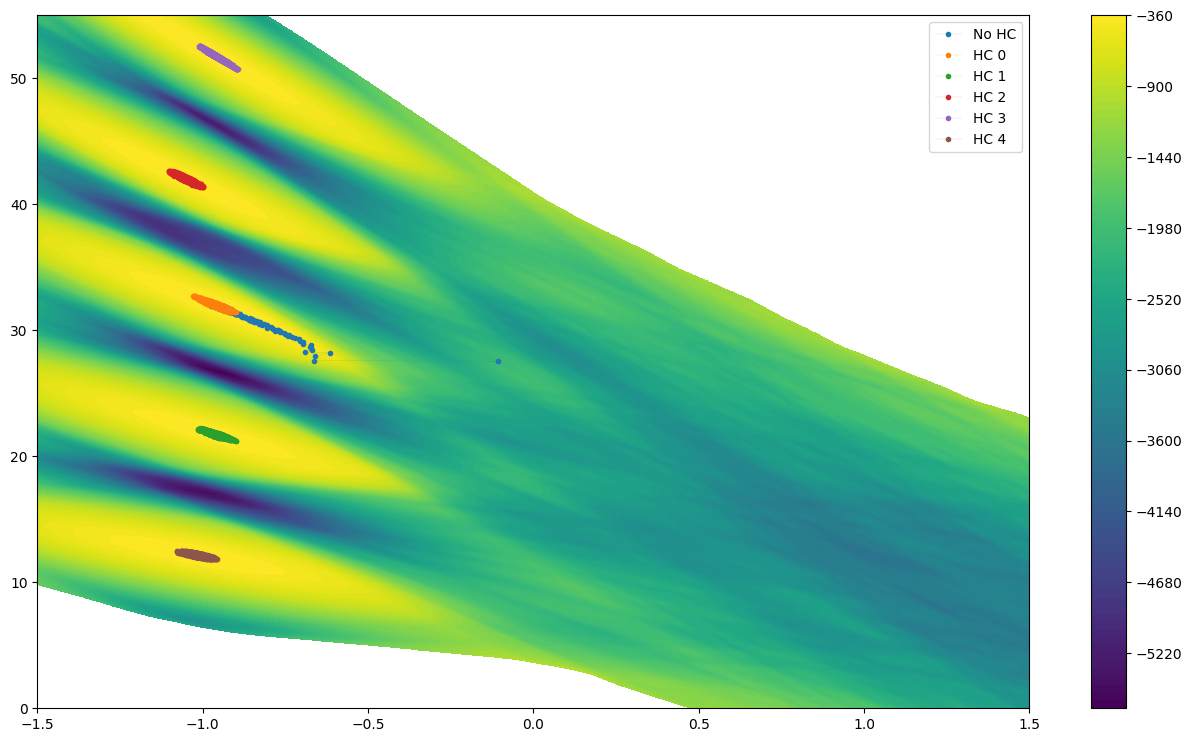

In [40]:
plt.figure(figsize=(16, 9))

CS = plt.contourf(X_contour, Y_contour, Z_contour, levels=100)
plt.colorbar(CS)

plt.plot(chains_no_hc['theta0'], chains_no_hc['theta1'], linestyle="--", linewidth=0.1, marker=".", label="No HC")

for i in range(num_hypercubes):
    plt.plot(chains_hc[i]['theta0'], chains_hc[i]['theta1'], linestyle="--", linewidth=0.1, marker=".", label=f"HC {i}")

plt.legend()

plt.show()